# __EDA notebook: Capstone ane.energy__

---
---

## __Basics__

---

### __Import libraries and tools__

In [155]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
import statsmodels.api as sm
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

---

### __Load datasets__

In [156]:
ohr_solar=pd.read_csv("../data/onlinehochrechnung_solar_mw.csv")

In [157]:
ohr_woff=pd.read_csv("../data/onlinehochrechnung_windoffshore_mw.csv", sep='///')

In [158]:
ohr_won=pd.read_csv("../data/onlinehochrechnung_windonshore_mw.csv", header=None)

---
---

## __Overview over datasets__

---

### __Solar dataset__

In [159]:
ohr_solar.head()

,dt_start_utc,fiftyhertz,tennet,amprion,transnetbw,nrv
0,2011-12-31 23:00:00,0.0,0.0,0.0,0.0,0.0
1,2012-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0
2,2012-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0
3,2012-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0
4,2012-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0


In [160]:
ohr_solar['dt_start_utc'].min()

'2011-12-31 23:00:00'

In [161]:
ohr_solar['dt_start_utc'].max()

'2021-07-11 21:00:00'

In [162]:
ohr_solar.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fiftyhertz,83519.0,1050.984036,1720.459702,-250.0,0.0,33.29,1527.775,10438.0300
tennet,83519.0,1591.799313,2489.054845,0.0,0.0,46.18,2475.400,13366.4700
amprion,83519.0,976.507596,1527.052842,0.0,0.0,28.49,1515.805,8126.1400
transnetbw,83519.0,605.147519,956.694446,0.0,0.0,13.75,911.000,4889.8678
nrv,83519.0,4224.438461,6571.637631,-250.0,0.0,141.15,6631.440,36306.7608


In [163]:
ohr_solar.shape

(83519, 6)

In [164]:
ohr_solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83519 entries, 0 to 83518
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dt_start_utc  83519 non-null  object 
 1   fiftyhertz    83519 non-null  float64
 2   tennet        83519 non-null  float64
 3   amprion       83519 non-null  float64
 4   transnetbw    83519 non-null  float64
 5   nrv           83519 non-null  float64
dtypes: float64(5), object(1)
memory usage: 3.8+ MB


---

#### __Check for null and nan values__

In [165]:
ohr_solar.isnull().sum()

dt_start_utc    0
fiftyhertz      0
tennet          0
amprion         0
transnetbw      0
nrv             0
dtype: int64

In [166]:
ohr_solar.isna().sum()

dt_start_utc    0
fiftyhertz      0
tennet          0
amprion         0
transnetbw      0
nrv             0
dtype: int64

---

#### __Get an understanding of the columns__

In [167]:
ohr_solar.columns

Index(['dt_start_utc', 'fiftyhertz', 'tennet', 'amprion', 'transnetbw', 'nrv'], dtype='object')

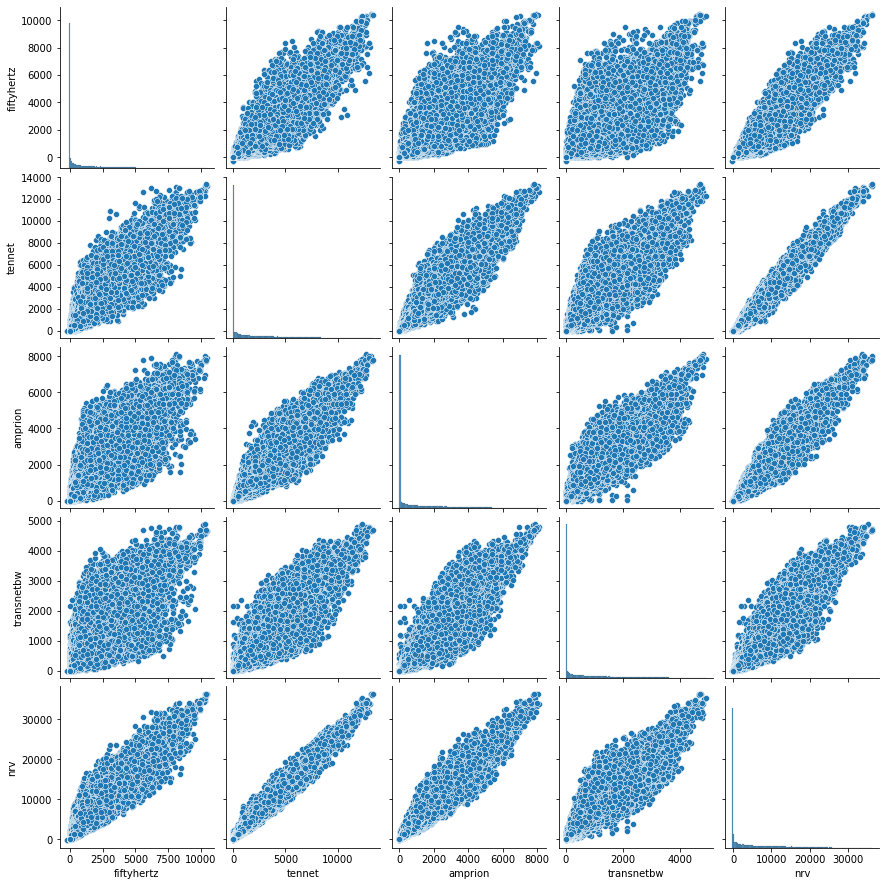

In [168]:
sns.pairplot(ohr_solar)

---

### __Onshore dataset__

In [169]:
ohr_won.head()

,0,1,2,3,4,5
0,2011-12-31 23:00:00,1271.8,1582.70,1542.03,262.10,4658.63
1,2012-01-01 00:00:00,1358.8,1816.21,1548.25,216.23,4939.49
2,2012-01-01 01:00:00,1339.2,2312.11,1650.40,157.80,5459.51
3,2012-01-01 02:00:00,1436.2,2881.49,1642.62,195.34,6155.65
4,2012-01-01 03:00:00,1707.8,3162.34,1709.99,225.16,6805.30


In [170]:
ohr_won[0].min()

'2011-12-31 23:00:00'

In [171]:
ohr_won[0].max()

'2021-07-01 21:00:00'

In [172]:
ohr_won.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
1,83279.0,3185.409040,3136.063750,-7.13,883.030,2113.89,4476.620,17148.24
2,83279.0,3847.237231,3644.082790,-180.65,1185.970,2652.88,5320.690,20572.94
3,83279.0,1628.170237,1753.307424,0.00,408.735,980.75,2186.125,9983.00
4,83279.0,201.736594,277.085107,0.00,25.145,84.56,258.320,1555.50
5,83279.0,8862.553114,8278.017439,28.50,2956.700,6146.80,11949.415,48106.83


In [173]:
ohr_won.shape

(83279, 6)

In [174]:
ohr_won.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83279 entries, 0 to 83278
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       83279 non-null  object 
 1   1       83279 non-null  float64
 2   2       83279 non-null  float64
 3   3       83279 non-null  float64
 4   4       83279 non-null  float64
 5   5       83279 non-null  float64
dtypes: float64(5), object(1)
memory usage: 3.8+ MB


---

#### __Check for nan and null values__

In [175]:
ohr_won.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

In [176]:
ohr_won.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

---

#### __Get an understanding of the columns__

In [177]:
ohr_won.columns

Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')

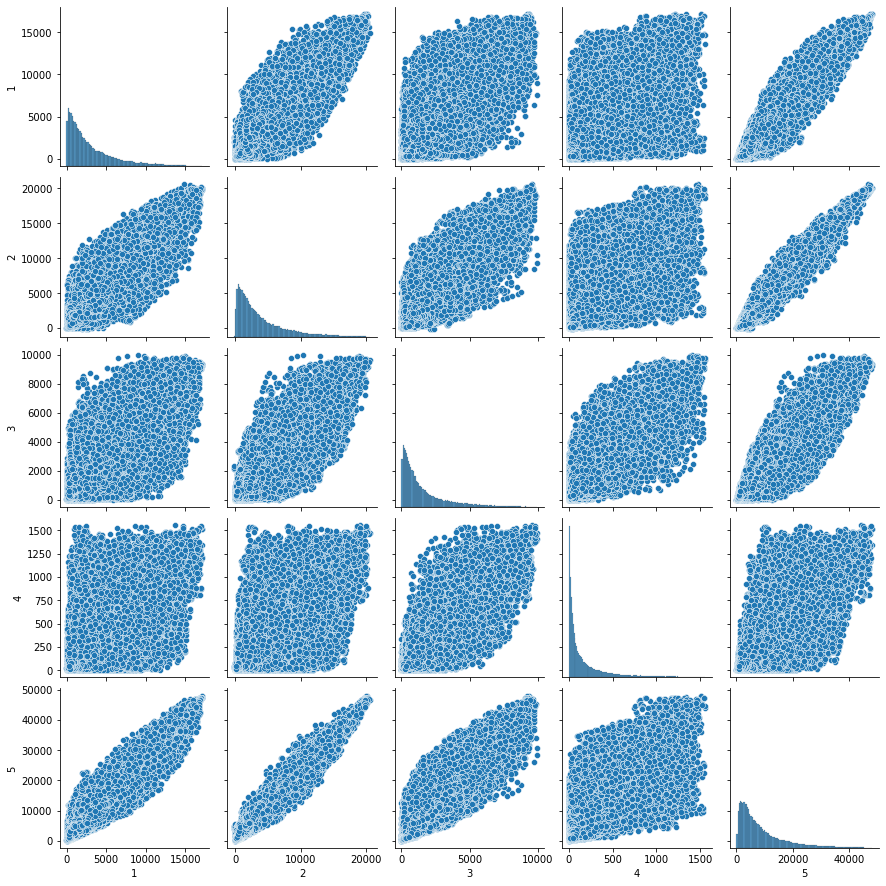

In [178]:
sns.pairplot(ohr_won)

---

### __Offshore dataset__

In [179]:
ohr_woff.head(20)

,dt_start_utc,fiftyhertz,tennet,amprion,transnetbw,nrv//
0,2012-12-31 23:00:00,48.00,136.05,NaN,NaN,184.05
1,2013-01-01 00:00:00,48.00,119.93,NaN,NaN,167.93
2,2013-01-01 01:00:00,48.00,83.69,NaN,NaN,131.69
3,2013-01-01 02:00:00,48.00,49.24,NaN,NaN,97.24
4,2013-01-01 03:00:00,48.00,40.35,NaN,NaN,88.35
5,2013-01-01 04:00:00,48.00,21.78,NaN,NaN,69.78
6,2013-01-01 05:00:00,48.00,16.55,NaN,NaN,64.55
7,2013-01-01 06:00:00,48.00,20.31,NaN,NaN,68.31
8,2013-01-01 07:00:00,48.00,24.72,NaN,NaN,72.72
9,2013-01-01 08:00:00,48.00,59.69,NaN,NaN,107.69


In [180]:
ohr_woff['dt_start_utc'].min()

'2012-12-31 23:00:00'

In [181]:
ohr_woff['dt_start_utc'].max()

'2021-07-11 21:00:00'

In [182]:
ohr_woff.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fiftyhertz,74735.0,225.705774,288.899235,0.0,22.000,84.88,321.250,1408.97
tennet,74735.0,1492.299564,1641.363088,0.0,143.835,767.46,2465.860,6358.63
amprion,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transnetbw,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nrv//,74735.0,1718.005339,1840.922577,0.0,195.880,965.89,2781.835,7315.50


In [183]:
ohr_woff.describe

<bound method NDFrame.describe of               dt_start_utc  fiftyhertz   tennet  amprion  transnetbw    nrv//
0      2012-12-31 23:00:00       48.00   136.05      NaN         NaN   184.05
1      2013-01-01 00:00:00       48.00   119.93      NaN         NaN   167.93
2      2013-01-01 01:00:00       48.00    83.69      NaN         NaN   131.69
3      2013-01-01 02:00:00       48.00    49.24      NaN         NaN    97.24
4      2013-01-01 03:00:00       48.00    40.35      NaN         NaN    88.35
...                    ...         ...      ...      ...         ...      ...
74730  2021-07-11 17:00:00      122.44  1097.56      NaN         NaN  1220.00
74731  2021-07-11 18:00:00      174.30  1134.57      NaN         NaN  1308.87
74732  2021-07-11 19:00:00      213.83  1178.19      NaN         NaN  1392.02
74733  2021-07-11 20:00:00      255.14  1424.01      NaN         NaN  1679.15
74734  2021-07-11 21:00:00      280.63  1746.76      NaN         NaN  2027.39

[74735 rows x 6 columns]>

In [184]:
ohr_woff.shape

(74735, 6)

In [185]:
ohr_woff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74735 entries, 0 to 74734
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dt_start_utc  74735 non-null  object 
 1   fiftyhertz    74735 non-null  float64
 2   tennet        74735 non-null  float64
 3   amprion       0 non-null      float64
 4   transnetbw    0 non-null      float64
 5   nrv//         74735 non-null  float64
dtypes: float64(5), object(1)
memory usage: 3.4+ MB


---

#### __Check for nan and null values__

In [186]:
ohr_woff.isna().sum()

dt_start_utc        0
fiftyhertz          0
tennet              0
amprion         74735
transnetbw      74735
nrv//               0
dtype: int64

In [187]:
ohr_woff.isnull().sum()

dt_start_utc        0
fiftyhertz          0
tennet              0
amprion         74735
transnetbw      74735
nrv//               0
dtype: int64

Delete the null and nan columns

In [188]:
ohr_woff = ohr_woff.drop(['amprion', 'transnetbw'], axis = 1)

---

#### __Get an understanding of the columns__

In [189]:
ohr_woff.columns

Index(['dt_start_utc', 'fiftyhertz', 'tennet', 'nrv//'], dtype='object')

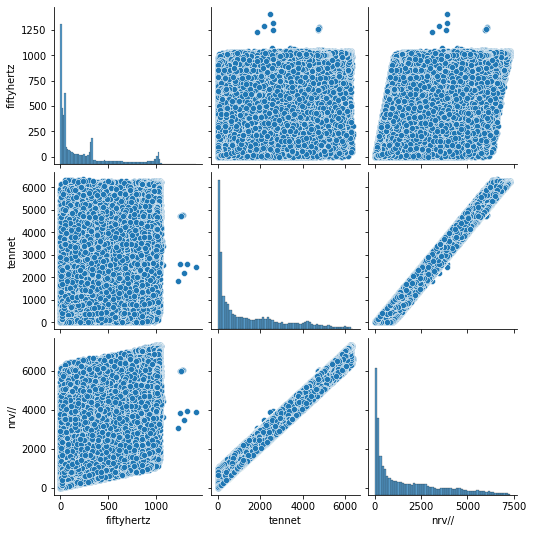

In [190]:
sns.pairplot(ohr_woff)

---

## __Columns of the datasets__

In [191]:
ohr_solar.columns

Index(['dt_start_utc', 'fiftyhertz', 'tennet', 'amprion', 'transnetbw', 'nrv'], dtype='object')

In [192]:
ohr_woff.columns

Index(['dt_start_utc', 'fiftyhertz', 'tennet', 'nrv//'], dtype='object')

---

#### __Rename the last column in the Offshore dataset and delete //__

In [196]:
#ohr_woff=ohr_woff.rename(columns={'nrv//': 'nrv'})
ohr_woff=ohr_woff.rename(columns={ohr_woff.columns[3]:'nrv' })

In [197]:
ohr_woff.head()

,dt_start_utc,fiftyhertz,tennet,nrv
0,2012-12-31 23:00:00,48.0,136.05,184.05
1,2013-01-01 00:00:00,48.0,119.93,167.93
2,2013-01-01 01:00:00,48.0,83.69,131.69
3,2013-01-01 02:00:00,48.0,49.24,97.24
4,2013-01-01 03:00:00,48.0,40.35,88.35


---

#### __Rename the unnamed columns in the Onshore dataset__

In [198]:
ohr_won.columns

Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')

In [199]:
ohr_won=ohr_won.rename(columns={ohr_won.columns[0]: 'dt_start_utc', ohr_won.columns[1]: 'fiftyhertz', ohr_won.columns[2]:'tennet', ohr_won.columns[3]:'amprion', ohr_won.columns[4]:'transnetbw', ohr_won.columns[5]:'nrv' })

In [200]:
ohr_won.head()

,dt_start_utc,fiftyhertz,tennet,amprion,transnetbw,nrv
0,2011-12-31 23:00:00,1271.8,1582.70,1542.03,262.10,4658.63
1,2012-01-01 00:00:00,1358.8,1816.21,1548.25,216.23,4939.49
2,2012-01-01 01:00:00,1339.2,2312.11,1650.40,157.80,5459.51
3,2012-01-01 02:00:00,1436.2,2881.49,1642.62,195.34,6155.65
4,2012-01-01 03:00:00,1707.8,3162.34,1709.99,225.16,6805.30


---

### __Get an understanding of the column names meaning__

---

#### __Amprion__ 

* __one of four transmission system operators in Germany__
* __extra-high-voltage network is 11,000 km long__ and transports electricity across an area that extends from Lower Saxony to the Alps. 
* __Around a third of Germany’s economic output is generated there__. 
* Also performs overarching operations for integrated grid systems in Germany and Europe
* 2 offshore wind farms: DOLWIN4 and BORWIN4 - operation start 2028

    https://www.amprion.net/

##### __Market Platform__

* Grid Losses
* Reserve Power Plants 
* Control Energy
* Interruptible Loads 

---

#### __TenneT__ 

* __one of four transmission system operators in Germany and the Netherlands__
* 27,000 high voltage pylons
* __24,000 km high-voltage network__
* 99.9999% grid availability
* Onshore and Offshore projects
* 14 total connected offshore wind farms
* 16 interconnections
* 42,000,000 end users

    https://www.tennet.eu/#&panel1-1

---

#### __Transnet BW__

* __one of four transmission system operators in Germany__: Baden-Württemberg but ensure that electricity is supplied to the region, Germany and throughout Europe
* former part of EnBW, spun off to separate company due to the European Commission's requirements for the liberalisation of the energy market
* __power grid lines of 3,200 km__
* 11,000,000 end users
* cooperation with Amprion for the __Ultranet__ grid expansion project
* cooperation with TenneT: planning and implementing __SuedLink__ wind power line (700 km, largest infrastructure project, north-south connection)



    https://www.transnetbw.de/de

##### __Link to infeed:__ 

* https://www.transnetbw.com/en/transparency/market-data/key-figures

---

#### __50Hertz__

* 50Hertz Transmission is __one of four transmission system operators in Northern and Eastern Germany__
* __power grid lines of 10,380 km__
* 18,000,000 end users
* 50Hertz is a forerunner in the field of secure integration of renewable energy: in our grid area, more than 60 percent of the electricity consumed is already generated from renewable sources – until 2032 we want to integrate 100 percent securely. 
* 2 Offshore Wind parks: Ostwind 2 (GER), Arcadis Ost 1 (Belgian Wind Park Operator Parkwind)
* Connect Arcadis Ost 1 and Baltic Eagle (both Baltic Sea)- installation of third cable system planned for 2022

---

#### __NRV NetzRegelVerbund__

* Grid Control Cooperation: innovative network control concept, by means of which the four German transmission system operators (TSOs) optimise their control energy use and the control reserve provision technically and economically through an intelligent communication between the load-frequency controllers of the TSOs
* TSOs: 50Hertz, Amprion, TenneT, Transnet BW

* https://www.regelleistung.net/apps/datacenter/activated-values/?cooperation=NRV&qualities=OPERATIONAL&qualities=ASSURED&seriesGroups=HIJQag%2BgIgohCCMAKEkBUCMBWAskA

---

### __Renewables in Europe__

Windparks:

* https://www.thewindpower.net/online_access_de.php

* https://www.thewindpower.net/store_continent_de.php?id_zone=1000

Offshore: 

* http://153.97.132.92/qgiswebclient.html?map=/var/qgis-web-client/projects/wind_farm.qgs&searchtables=search_wind&lang=de&startExtent=6.4,51.3,14.5,58.3

Offshore network overview:

* https://www.erneuerbare-energien.de/EE/Navigation/DE/Technologien/Windenergie-auf-See/Offshore-Projekte/Netzanbindungen/netzanbindungen.html

---

### __Split time stemp__

In [201]:
ohr_solar['year'] = pd.to_datetime(ohr_solar['dt_start_utc']).dt.year
ohr_solar['month'] = pd.to_datetime(ohr_solar['dt_start_utc']).dt.month
ohr_solar['day'] = pd.to_datetime(ohr_solar['dt_start_utc']).dt.day
ohr_solar['hour'] = pd.to_datetime(ohr_solar['dt_start_utc']).dt.hour
ohr_solar['minute'] = pd.to_datetime(ohr_solar['dt_start_utc']).dt.minute
ohr_solar['seconds'] = pd.to_datetime(ohr_solar['dt_start_utc']).dt.second

In [202]:
ohr_woff['year'] = pd.to_datetime(ohr_woff['dt_start_utc']).dt.year
ohr_woff['month'] = pd.to_datetime(ohr_woff['dt_start_utc']).dt.month
ohr_woff['day'] = pd.to_datetime(ohr_woff['dt_start_utc']).dt.day
ohr_woff['hour'] = pd.to_datetime(ohr_woff['dt_start_utc']).dt.hour
ohr_woff['minute'] = pd.to_datetime(ohr_woff['dt_start_utc']).dt.minute
ohr_woff['seconds'] = pd.to_datetime(ohr_woff['dt_start_utc']).dt.second

In [203]:
ohr_won['year'] = pd.to_datetime(ohr_won['dt_start_utc']).dt.year
ohr_won['month'] = pd.to_datetime(ohr_won['dt_start_utc']).dt.month
ohr_won['day'] = pd.to_datetime(ohr_won['dt_start_utc']).dt.day
ohr_won['hour'] = pd.to_datetime(ohr_won['dt_start_utc']).dt.hour
ohr_won['minute'] = pd.to_datetime(ohr_won['dt_start_utc']).dt.minute
ohr_won['seconds'] = pd.to_datetime(ohr_won['dt_start_utc']).dt.second


No solar values between 4PM and 7AM due to sun light availability in winter month. In summer between 8PM and 2AM.

In [215]:
ohr_solar.tail(10)

,dt_start_utc,fiftyhertz,tennet,amprion,transnetbw,nrv,year,month,day,hour,minute,seconds
83509,2021-07-11 12:00:00,6327.50,5911.26,4342.55,2985.1108,19566.4208,2021,7,11,12,0,0
83510,2021-07-11 13:00:00,5526.00,6021.58,4278.82,2934.5472,18760.9472,2021,7,11,13,0,0
83511,2021-07-11 14:00:00,4946.00,5771.03,4099.14,2719.3978,17535.5678,2021,7,11,14,0,0
83512,2021-07-11 15:00:00,3729.25,4847.51,3360.92,2248.5985,14186.2785,2021,7,11,15,0,0
83513,2021-07-11 16:00:00,2196.75,3308.95,2256.01,1498.0085,9259.7185,2021,7,11,16,0,0
83514,2021-07-11 17:00:00,1016.25,1640.80,1082.00,672.1692,4411.2192,2021,7,11,17,0,0
83515,2021-07-11 18:00:00,314.50,499.48,281.63,171.1928,1266.8028,2021,7,11,18,0,0
83516,2021-07-11 19:00:00,19.50,39.09,17.58,4.7618,80.9318,2021,7,11,19,0,0
83517,2021-07-11 20:00:00,0.00,0.05,0.02,0.0000,0.0700,2021,7,11,20,0,0
83518,2021-07-11 21:00:00,0.00,0.00,0.00,0.0000,0.0000,2021,7,11,21,0,0


In [216]:
ohr_woff.head(10)

,dt_start_utc,fiftyhertz,tennet,nrv,year,month,day,hour,minute,seconds
0,2012-12-31 23:00:00,48.0,136.05,184.05,2012,12,31,23,0,0
1,2013-01-01 00:00:00,48.0,119.93,167.93,2013,1,1,0,0,0
2,2013-01-01 01:00:00,48.0,83.69,131.69,2013,1,1,1,0,0
3,2013-01-01 02:00:00,48.0,49.24,97.24,2013,1,1,2,0,0
4,2013-01-01 03:00:00,48.0,40.35,88.35,2013,1,1,3,0,0
5,2013-01-01 04:00:00,48.0,21.78,69.78,2013,1,1,4,0,0
6,2013-01-01 05:00:00,48.0,16.55,64.55,2013,1,1,5,0,0
7,2013-01-01 06:00:00,48.0,20.31,68.31,2013,1,1,6,0,0
8,2013-01-01 07:00:00,48.0,24.72,72.72,2013,1,1,7,0,0
9,2013-01-01 08:00:00,48.0,59.69,107.69,2013,1,1,8,0,0


In [217]:
ohr_won.head(10)

,dt_start_utc,fiftyhertz,tennet,amprion,transnetbw,nrv,year,month,day,hour,minute,seconds
0,2011-12-31 23:00:00,1271.8,1582.70,1542.03,262.10,4658.63,2011,12,31,23,0,0
1,2012-01-01 00:00:00,1358.8,1816.21,1548.25,216.23,4939.49,2012,1,1,0,0,0
2,2012-01-01 01:00:00,1339.2,2312.11,1650.40,157.80,5459.51,2012,1,1,1,0,0
3,2012-01-01 02:00:00,1436.2,2881.49,1642.62,195.34,6155.65,2012,1,1,2,0,0
4,2012-01-01 03:00:00,1707.8,3162.34,1709.99,225.16,6805.30,2012,1,1,3,0,0
5,2012-01-01 04:00:00,1722.0,3520.95,1978.50,216.87,7438.32,2012,1,1,4,0,0
6,2012-01-01 05:00:00,1966.5,3967.42,2013.68,202.82,8150.42,2012,1,1,5,0,0
7,2012-01-01 06:00:00,2236.2,4109.00,2179.74,248.16,8773.10,2012,1,1,6,0,0
8,2012-01-01 07:00:00,2782.0,4392.72,2334.64,256.12,9765.48,2012,1,1,7,0,0
9,2012-01-01 08:00:00,3472.2,4641.13,2286.57,264.47,10664.37,2012,1,1,8,0,0
